In [1]:
# 手写数字数据，784属性，并不是每个都很重要
# digits.csv 

import numpy as np
import pandas as pd

from pandas import DataFrame,Series

In [3]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.decomposition import PCA

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
# 查看数据
digits = pd.read_csv('./data/digits.csv')

digits.shape

(42000, 785)

In [5]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


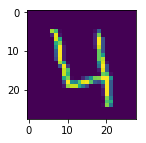

In [7]:
digit = digits.loc[3][1:].reshape((28,28))


plt.figure(figsize=(2,2))

plt.imshow(digit)


In [9]:
digits['pixel0'].unique()

# pixel0这一列所有的数据都是0 42000个数字，这一列完全相同
# 如果使用这一列属性进行分类，没有任何作用，没有差别，没有差异
# 之所以能够将数据分开，就是因为数据之间存在差异


array([0])

In [10]:
digits['pixel10'].unique()

array([0])

In [11]:
digits['pixel783'].unique()

array([0])

In [12]:
digits['pixel750'].unique()

array([  0,  45, 253, 187, 226,  34,  36,  51, 141,  91, 116,  12, 152,
        63,  53,  14,  18, 223,   3,  50, 231, 166,   1,  19,  54,   6,
        56,  15,  41,  10, 255,   9,  66,  28, 220, 112, 143])

In [ ]:
# 如果不去掉，进行机器学习，耗时特别长，准确率很低

In [13]:
# PCA 降维，抽取关键的数据，权重比较大的数据
# whithen 白化处理，使处理之后的数据，方差一致
pca = PCA(n_components=150,whiten=True)

In [14]:
target = digits['label']

# 数据，默认删除列
data = digits.drop(axis=1,labels='label')

In [15]:
data.shape

(42000, 784)

In [16]:
data_pca = pca.fit_transform(data)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# 42000
X_train,X_test,y_train,y_test = train_test_split(data_pca,target,test_size = 0.001)

In [19]:
# 非线性
# GridSercheCV
svc = SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
# 现在准确率预测
# 42个数据
svc.score(X_test,y_test)

0.9285714285714286

In [21]:
svc.score(X_train,y_train)

0.995686162352829

In [22]:
# 使用KNN
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.8095238095238095

In [23]:
knn.score(X_train,y_train)

0.8788073788073788